## Power Transformer

   Power transformer is a class from scikit learn library, used to transform data so that data is distributed linearly. <br>
   We will see how to work with Box-Cox transform and Yeo-Johnson transorm.
    

In [31]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# reading file to dataframe
concrete = pd.read_csv('./Datasets/Concrete_Data.csv')

In [11]:
# checking top 5 rows of dataset
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
# size of dataframe
concrete.shape

(1030, 9)

In [13]:
# checking missing values
concrete.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [14]:
# checking if data has zeroes or negative values. this would create problem for box-cox
concrete.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [19]:
# splitting data as input. output, train, test

X = concrete.drop(columns=["Strength"])
y = concrete.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# creating model object
lr = LinearRegression()

# fit
lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

# accuracy
print("Accuracy: ",r2_score(y_test, y_pred))

# cross validate
print("Cross validate accuracy: ", np.mean(cross_val_score(lr, X, y, scoring='r2')))

Accuracy:  0.6275531792314851
Cross validate accuracy:  0.46099404916628667


It can be observed the accuracy difference is too much while cross validation accuracy is very low. <br><br><br><br>

## Plotting the data distribution to see linearity of the data distribution

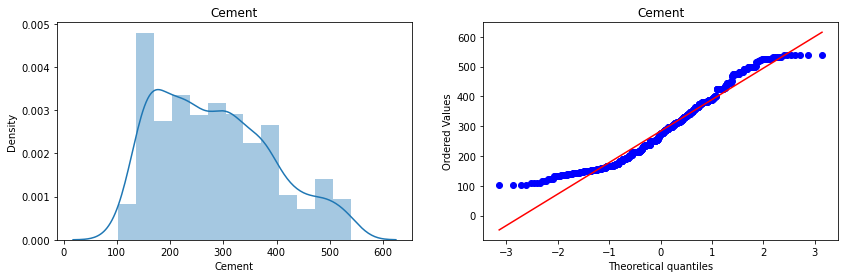

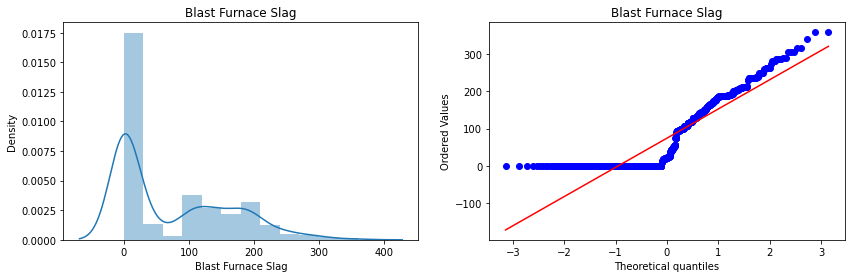

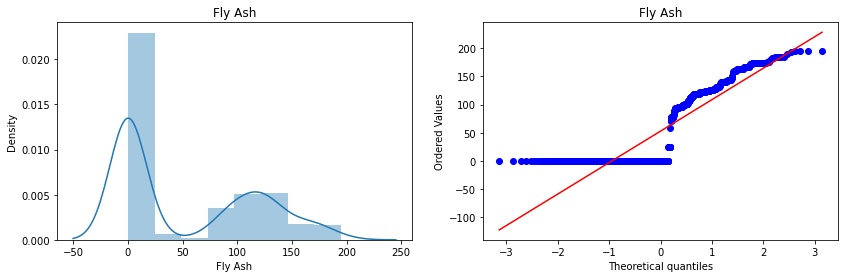

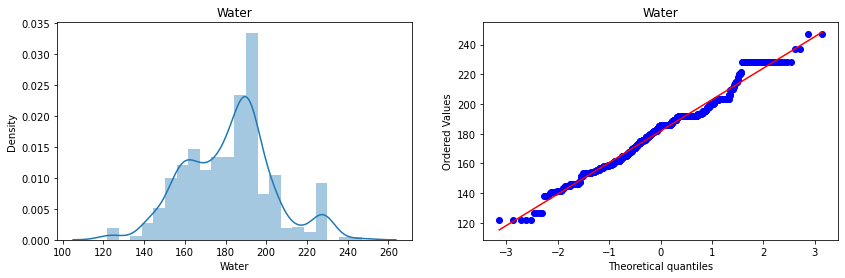

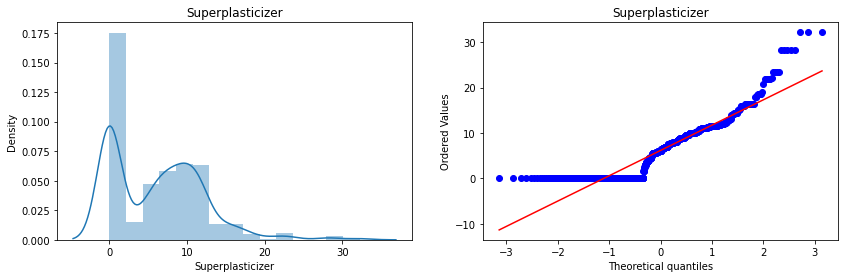

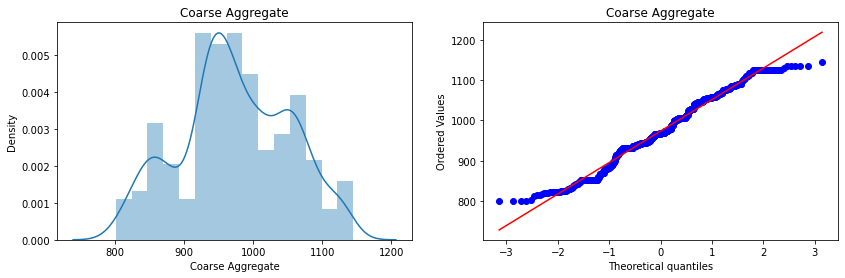

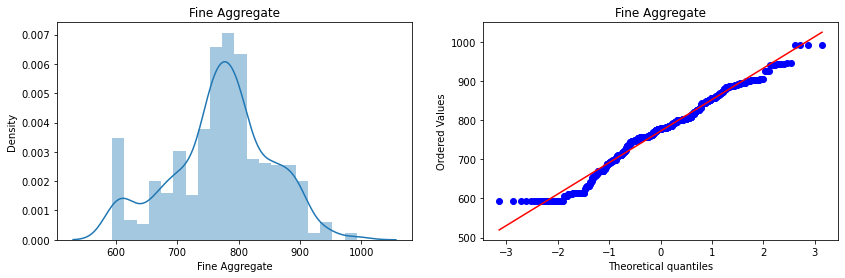

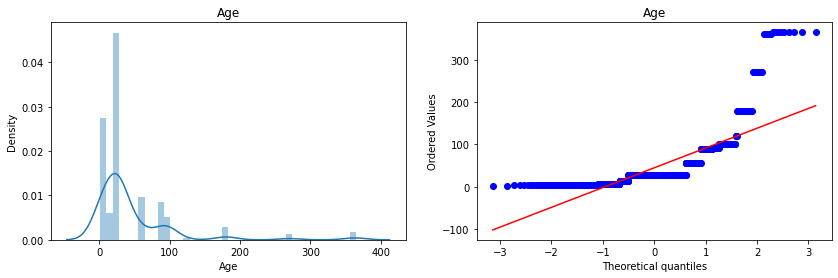

In [32]:
for col in X_train.columns:
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(col)

    plt.show()

From above plots we can observe data is not linearly distributed for most of the columns. <br><br><br><br>

## Box-Cox Transform

In [34]:
# Box-Cox Transform

# class object
PT = PowerTransformer(method='box-cox')

X_train_trans = PT.fit_transform(X_train+0.000001) 
X_test_trans = PT.transform(X_test+0.000001)

# forming dataframe to show lambda value for each column
pd.DataFrame({'columns': X_train.columns, 'box-cox_lambda' : PT.lambdas_})

,columns,box-cox_lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In the above code we are adding 0.000001 to raise values from zeroes in the column as box-cox is not applicable when data has zeroes or negative values <br><br><br><br>

In [36]:
# model object
lr = LinearRegression()

# fit
lr.fit(X_train_trans, y_train)

# predict
y_pred = lr.predict(X_test_trans)

# accuracy
r2_score(y_test, y_pred)

0.8047825006181188

In [51]:
# cross validate

PT = PowerTransformer(method='box-cox')
X_trans = PT.fit_transform(X+0.000001)

lr = LinearRegression()
np.mean(cross_val_score(lr, X_trans, y, scoring='r2'))

0.6662950327869243

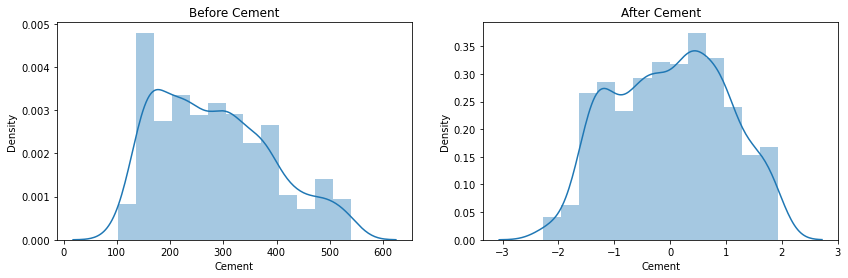

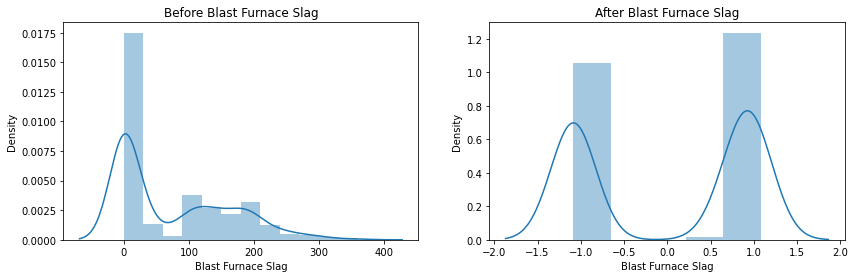

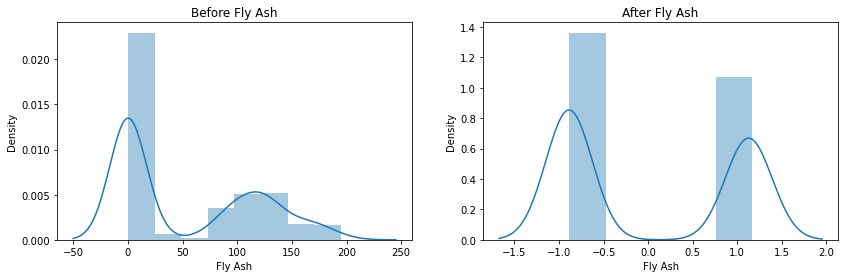

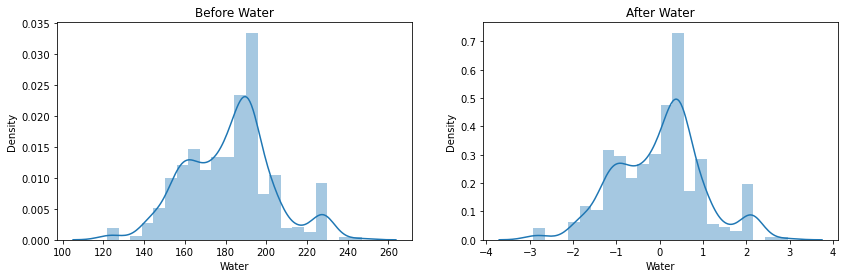

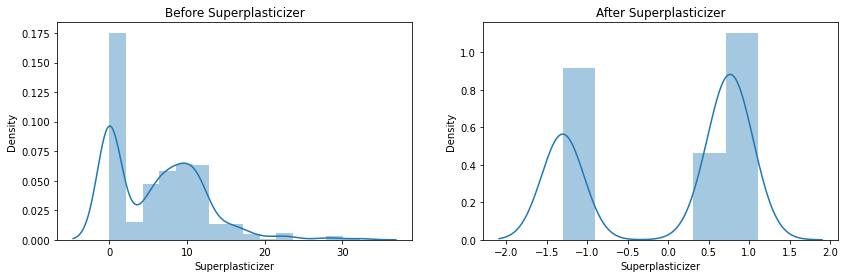

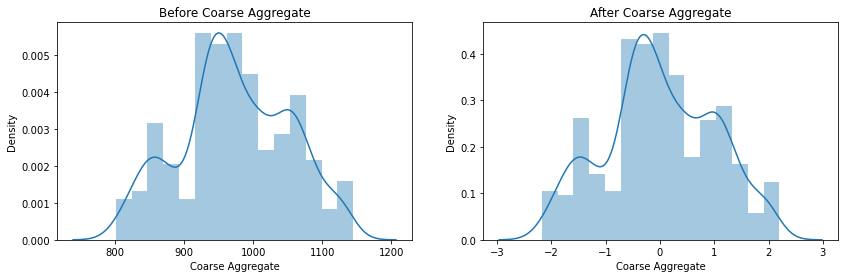

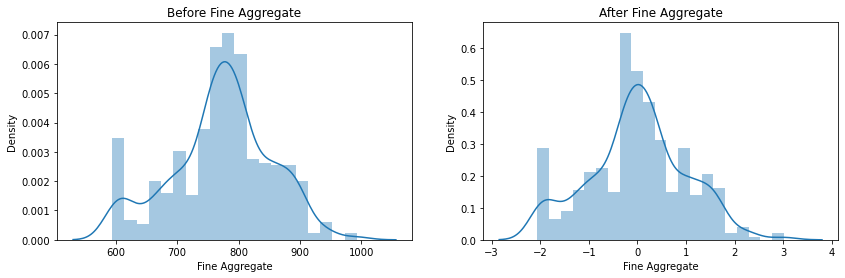

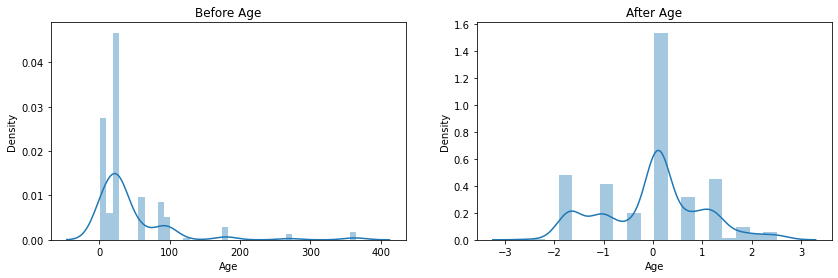

In [41]:
# Before and After comparison - plotting the data distribution
X_train_trans = pd.DataFrame(X_train_trans, columns=X_train.columns)

for col in X_train_trans.columns:
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title("Before " + col)

    plt.subplot(122)
    sns.distplot(X_train_trans[col])
    plt.title("After " + col)

    plt.show()

In above plots Age column data is nicely distributed after transformation

## Yeo - Johnson Transform

In [45]:
# Yeo - Johnson Transform

# transform class object
PTY = PowerTransformer()

# tranform
X_train_transY = PTY.fit_transform(X_train)
X_test_transY = PTY.transform(X_test)

lr = LinearRegression()
# fit
lr.fit(X_train_transY, y_train)

# predict
y_predY = lr.predict(X_test_transY)

# accuracy
print(r2_score(y_test, y_predY))

pd.DataFrame({'columns' : X_train.columns, 'Yeo-Johnson lambdas':PTY.lambdas_})

0.8161906513339305


,columns,Yeo-Johnson lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [46]:
# cross validate

X_transY = PTY.fit_transform(X)

print(np.mean(cross_val_score(lr, X_transY, y, scoring='r2')))

pd.DataFrame(X_train_transY, columns=X_train.columns)

0.6834625134285744


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,1.018168,1.130993,-0.301917,1.250424,-0.262504,-0.677567,0.105778
1,1.244813,0.222584,1.166671,-0.165051,0.643937,-1.912717,-0.314063,0.105778
2,0.079751,-1.056928,1.143637,-1.047299,0.796163,1.018407,0.025954,-1.664976
3,-0.145770,0.835725,1.009268,0.581232,0.585508,-1.750770,0.583249,0.105778
4,-1.131111,0.487511,1.150162,-1.105305,0.886463,1.368579,0.262619,-1.664976
...,...,...,...,...,...,...,...,...
819,0.183530,1.146737,-0.884932,-1.769937,0.924953,0.390560,0.358772,-1.664976
820,-0.198870,-1.056928,1.151932,-1.839142,0.999192,1.445978,0.322793,-0.491262
821,-0.844661,-1.056928,1.152152,-0.706091,0.796163,1.345370,0.297153,1.257511
822,1.565741,0.921796,-0.884932,-0.019305,0.689050,-1.537249,0.076208,0.105778


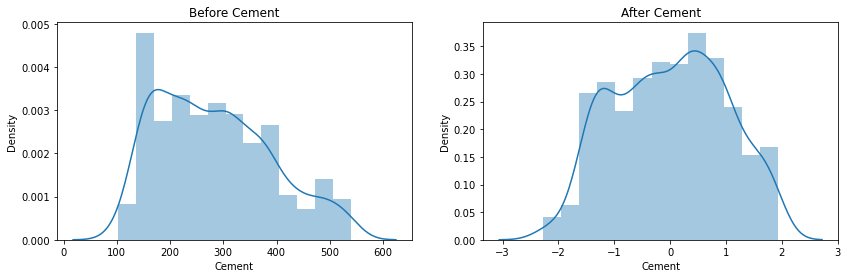

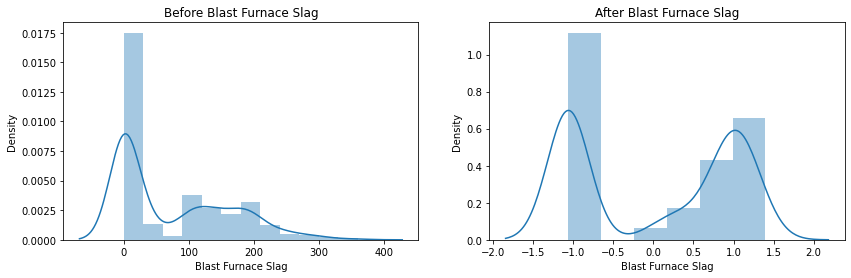

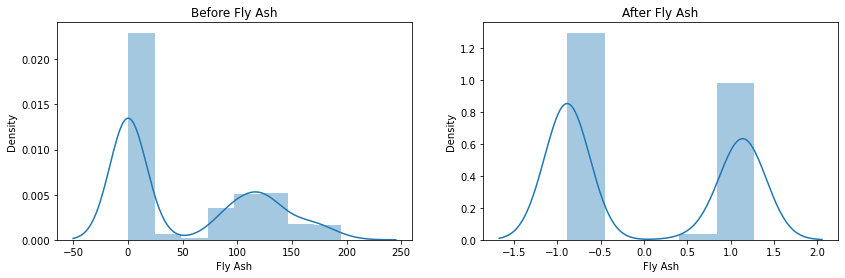

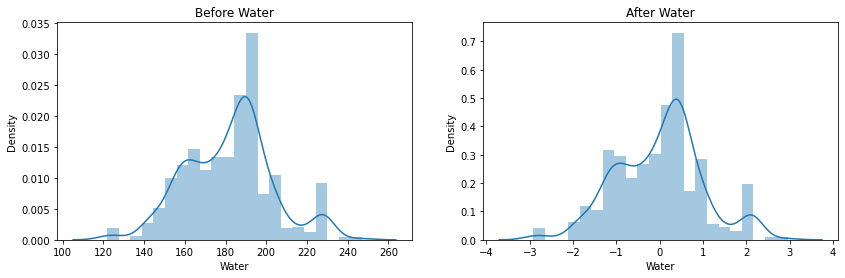

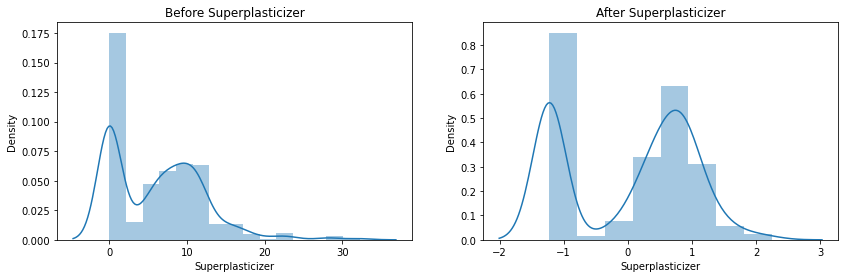

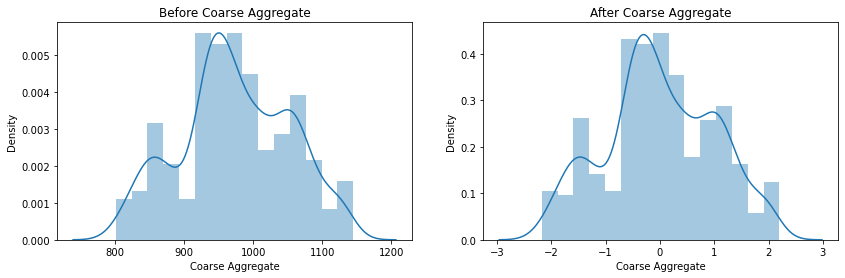

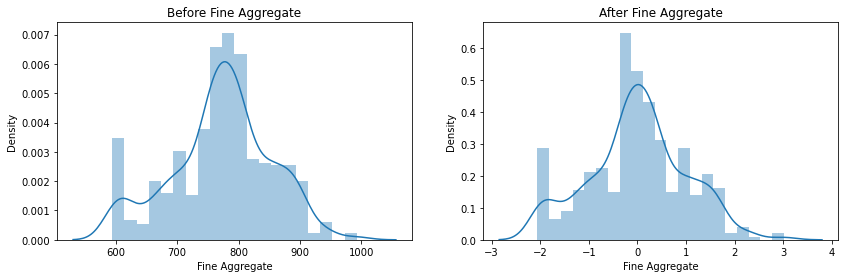

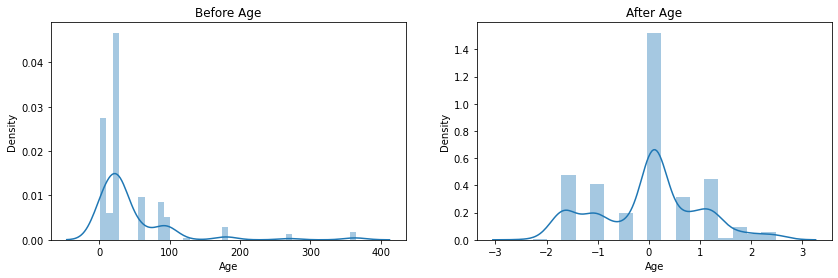

In [47]:
# Before and After comparison - plotting the data distribution
X_train_transY = pd.DataFrame(X_train_transY, columns=X_train.columns)

for col in X_train_transY.columns:
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title("Before " + col)

    plt.subplot(122)
    sns.distplot(X_train_transY[col])
    plt.title("After " + col)

    plt.show()

In [49]:
# Lambdas of box-cox and Yeo johnson

pd.DataFrame({'columns': X_train.columns, 'box-cox': PT.lambdas_, 'Yeo Johnson': PTY.lambdas_})

,columns,box-cox,Yeo Johnson
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.025273,0.016633
2,Fly Ash,-0.032412,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.099711,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830763
7,Age,0.048975,0.001771


## Summary

We have discussed how the distribution changes with box-cox and yeo-johnson tranformers. Depending on the data and type of distribution we can choose transformers and see which gives closer prediction accuracy